## Latihan 1 Komputasi Statistika
- **Kelas: A**
- **Anggota Kelompok:**

| No. | Nama| NPM|
|:---:|-----|:---:|
|1.|Abdul Muhaimin|2106703052|
|2.|Adriaan Waleleng|2106725072|
|3.|Diki Wahyudi|2106709131|
|4.|Justin Martinus|2106724832|

### Import Library

In [ ]:
# Load the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)

### Load Data

In [ ]:
# Load data
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle = True, random_state = 1, remove = ('headers', 'footers', 'quotes'))
documents = dataset.data

In [ ]:
print("Total Documents: ", len(documents))

Total Documents:  11314


In [ ]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Dataset ini mempunyai 11.314 dokumen teks yang tersebar dalam 20 newsgroups yang berbeda.

### Preprocessing

In [ ]:
# Load data dari list ke datafame
news_df = pd.DataFrame({'document':documents})

# Menyisakan hanya alfabet
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")

#Menghapus kata-kata yang sangat pendek dan umumnya tidak berguna
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# Membuat semua kata tidak kapital agar mencegah kasus sensitif kapital
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


In [ ]:
# Load stopwords
from spacy.lang.en.stop_words import STOP_WORDS as stop_words

# Tokenization - Memecah kalimat menjadi kata-kata
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())

# Menghapus stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# De-tokenization - Menggabungkan kembali kata-kata menjadi kalimat
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

### Singular Value Decomposition

Akan digunakan CountVectorizer sklearn untuk membuat matriks document-term dengan 1,000 term karena limit komputasi yang terbatas.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vsm = CountVectorizer(binary = False, lowercase = True, stop_words = 'english', max_features = 1000, #Membatasi hanya top 1000 terms 
max_df = 0.5)

In [ ]:
D = []
for i in range (len(news_df['clean_doc'])):
  D.append(news_df['clean_doc'][i])
A = vsm.fit_transform(D)

In [ ]:
print(type(A))
A.shape #melihat dimensi matriks

<class 'scipy.sparse.csr.csr_matrix'>


(11314, 1000)

In [ ]:
A.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 2, 0, 0]])

In [ ]:
# Solve dengan Numpy
U, s, V = np.linalg.svd(A.toarray())
print("ukuran-ukuran matriks = ", U.shape, s.shape, V.shape)
print(s)

ukuran-ukuran matriks =  (11314, 11314) (1000,) (1000, 1000)
[562.73322575 409.53341318 353.26163847 293.59997793 281.42713813
 256.8185316  241.01063867 229.24397799 228.16009122 207.27235737
 195.54572157 180.40923932 176.60964567 174.34689345 170.57146514
 168.12960601 157.22855968 148.55928998 146.02822423 144.56570079
 139.87409789 136.18523535 133.19125221 125.27606504 124.12590028
 117.90066215 116.11328018 114.00684572 107.08917283 104.92327706
 104.18165978 103.53138186 100.42321692  99.49814883  97.17432339
  93.5540726   91.13348125  90.12874371  87.72591352  87.25108032
  86.57791362  85.45806976  84.63824356  83.20115782  82.01325198
  80.83026092  79.83756928  79.19704159  78.84666758  77.11127905
  76.91091551  75.77519359  74.83183274  74.46912689  73.32059363
  72.17354345  70.48895629  69.0216928   67.9720013   67.81769518
  67.19944266  66.5519491   66.16160754  65.31548171  64.88870467
  64.06650387  63.53627603  62.49954279  61.15699668  60.36980255
  60.11457279  

### Visualisasi

In [ ]:
x_kata = V[0,:] # Baris pertama matrix V = sumbu x kata
y_kata = V[1,:] # Baris kedua matrix V = sumbu y kata

# Label dari setiap barisnya = kata-kata
print(vsm.vocabulary_)

{'sure': 870, 'story': 852, 'statement': 844, 'media': 534, 'israeli': 442, 'world': 985, 'having': 392, 'europe': 294, 'realize': 713, 'described': 231, 'letter': 480, 'think': 896, 'reason': 714, 'report': 732, 'clearly': 154, 'reports': 734, 'soldiers': 817, 'received': 718, 'government': 370, 'makes': 518, 'away': 73, 'look': 500, 'jews': 448, 'power': 667, 'yeah': 995, 'expect': 304, 'people': 630, 'read': 709, 'actually': 9, 'accept': 2, 'hard': 389, 'atheism': 64, 'need': 579, 'little': 492, 'faith': 314, 'logic': 497, 'runs': 758, 'sorry': 821, 'maybe': 530, 'start': 839, 'newsgroup': 584, 'forget': 340, 'points': 652, 'like': 486, 'know': 461, 'question': 702, 'sort': 822, 'arab': 46, 'countries': 203, 'want': 951, 'continue': 191, 'israel': 441, 'stop': 851, 'asking': 61, 'questions': 703, 'work': 981, 'begin': 81, 'attack': 66, 'group': 376, 'stupid': 859, 'center': 124, 'policy': 654, 'research': 739, 'change': 128, 'product': 686, 'area': 48, 'suspect': 872, 'clipper': 156

In [ ]:
print(str(vsm.vocabulary_))

{'sure': 870, 'story': 852, 'statement': 844, 'media': 534, 'israeli': 442, 'world': 985, 'having': 392, 'europe': 294, 'realize': 713, 'described': 231, 'letter': 480, 'think': 896, 'reason': 714, 'report': 732, 'clearly': 154, 'reports': 734, 'soldiers': 817, 'received': 718, 'government': 370, 'makes': 518, 'away': 73, 'look': 500, 'jews': 448, 'power': 667, 'yeah': 995, 'expect': 304, 'people': 630, 'read': 709, 'actually': 9, 'accept': 2, 'hard': 389, 'atheism': 64, 'need': 579, 'little': 492, 'faith': 314, 'logic': 497, 'runs': 758, 'sorry': 821, 'maybe': 530, 'start': 839, 'newsgroup': 584, 'forget': 340, 'points': 652, 'like': 486, 'know': 461, 'question': 702, 'sort': 822, 'arab': 46, 'countries': 203, 'want': 951, 'continue': 191, 'israel': 441, 'stop': 851, 'asking': 61, 'questions': 703, 'work': 981, 'begin': 81, 'attack': 66, 'group': 376, 'stupid': 859, 'center': 124, 'policy': 654, 'research': 739, 'change': 128, 'product': 686, 'area': 48, 'suspect': 872, 'clipper': 156

In [ ]:
A.shape[0]

11314

In [ ]:
idx_kata = dict(map(reversed, vsm.vocabulary_.items()))
Label = [idx_kata[j] for j in range(len(vsm.vocabulary_))]
print(Label)

['ability', 'able', 'accept', 'access', 'according', 'account', 'action', 'actions', 'actual', 'actually', 'added', 'addition', 'additional', 'address', 'administration', 'advance', 'advice', 'agencies', 'agree', 'algorithm', 'allow', 'allowed', 'allows', 'amendment', 'america', 'american', 'americans', 'analysis', 'angeles', 'anonymous', 'answer', 'answers', 'anti', 'anybody', 'apparently', 'appear', 'appears', 'apple', 'application', 'applications', 'apply', 'appreciate', 'appreciated', 'approach', 'appropriate', 'april', 'arab', 'archive', 'area', 'areas', 'aren', 'argument', 'arguments', 'armenia', 'armenian', 'armenians', 'arms', 'army', 'article', 'articles', 'asked', 'asking', 'assume', 'assuming', 'atheism', 'atheists', 'attack', 'attempt', 'author', 'authority', 'available', 'average', 'avoid', 'away', 'background', 'base', 'baseball', 'based', 'basic', 'basically', 'basis', 'begin', 'beginning', 'belief', 'beliefs', 'believe', 'best', 'better', 'bible', 'bike', 'bios', 'bits'

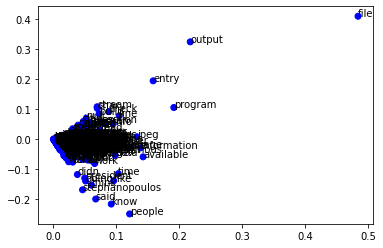

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x_kata, y_kata, c = ['b']*len(x_kata))
for i, L in enumerate(Label):
    ax.annotate(L, (x_kata[i], y_kata[i]))

### Kesimpulan
Dapat dilihat dari hasil visualisasi di atas bahwa mayoritas kata-kata menumpuk di grafik, yaitu pada sumbu $x$ bernilai 0 hingga 0.2 dan sumbu $y$ bernilai -0.2 hingga 0.2 dengan hanya sedikit kata-kata yang berada di luar interval tersebut seperti file, output, entry, dan program.